In [12]:
#importing libraries
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout, Flatten

In [15]:
#loas mnsit dataset
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


2

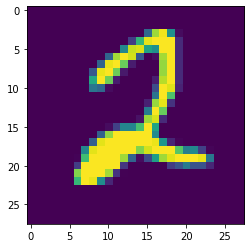

In [16]:
index = 8743
plt.imshow(X_train[index])
Y_train[index]

In [38]:
model = Sequential()


model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(784, activation=tf.nn.relu)) #28*28 = 784
model.add(Dropout(0.1))
# model.add(Dense(128, activation=tf.nn.relu))
model.add(Dense(10,activation=tf.nn.softmax))

In [39]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train,batch_size = 64, epochs=15)
#on my setup it took 150s to train 

Epoch 1/15
60000/60000 [==============================] - 10s 165us/sample - loss: 0.2165 - acc: 0.9366
Epoch 2/15
60000/60000 [==============================] - 10s 164us/sample - loss: 0.0876 - acc: 0.9740
Epoch 3/15
60000/60000 [==============================] - 10s 167us/sample - loss: 0.0573 - acc: 0.9827
Epoch 4/15
60000/60000 [==============================] - 10s 163us/sample - loss: 0.0420 - acc: 0.9870
Epoch 5/15
60000/60000 [==============================] - 10s 160us/sample - loss: 0.0325 - acc: 0.9901
Epoch 6/15
60000/60000 [==============================] - 10s 160us/sample - loss: 0.0251 - acc: 0.9920
Epoch 7/15
60000/60000 [==============================] - 10s 161us/sample - loss: 0.0203 - acc: 0.9936 
Epoch 8/15
60000/60000 [==============================] - 10s 161us/sample - loss: 0.0173 - acc: 0.9942
Epoch 9/15
60000/60000 [==============================] - 10s 161us/sample - loss: 0.0148 - acc: 0.9951
Epoch 10/15
60000/60000 [==============================] - 10s 

In [44]:
#evaluate on test data
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 96us/sample - loss: 0.0879 - acc: 0.9825


[0.08794149101948122, 0.9825]

training accuray 99.6%
test accuracy 98.2%


7


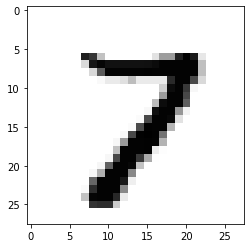

In [46]:
#test on any image from index 0 to 9999

image_index = 34
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())